In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.columns

Index(['2', 'Stuning even for the non-gamer',
       'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'],
      dtype='object')

In [5]:
df = df.rename(columns={'2' : 'Boolean', 'Stuning even for the non-gamer':'Subject',
       'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^':'Review',
     } )
df.tail()

,Boolean,Subject,Review
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...
3599998,2,Makes My Blood Run Red-White-And-Blue,I agree that every American should read this b...


In [6]:
df.shape

(3599999, 3)

In [7]:
ndf = df.copy()

In [8]:
#pd.set_option('display.max_colwidth', None) # To display the whole text of the given cell
#pd.reset_option('display.max_colwidth') # To Reverse above option
ndf.loc[3555555]

Boolean                                                    2
Subject                            Drunken philosophy kungfu
Review     Philosophical martial arts film, with some cre...
Name: 3555555, dtype: object

In [9]:
ndf['Boolean'].value_counts()

1    1800000
2    1799999
Name: Boolean, dtype: int64

Text(0.5, 0, 'Reviews')

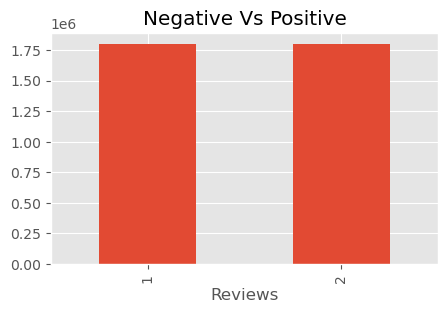

In [10]:
ax = ndf['Boolean'].value_counts().sort_index().plot(kind='bar',
          title='Negative Vs Positive',
          figsize=(5, 3))
ax.set_xlabel('Reviews')

In [11]:
example = ndf['Review'][85]
print(example)

This book drew air pretty bad. I have no idea why someone would waste their time writing it. Boy did it draw air. Do not read this book.


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ANKIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'book', 'drew', 'air', 'pretty', 'bad', '.', 'I', 'have', 'no']

In [32]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANKIT SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('book', 'NN'),
 ('drew', 'VBD'),
 ('air', 'NN'),
 ('pretty', 'RB'),
 ('bad', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('no', 'DT')]

In [38]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\ANKIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\ANKIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

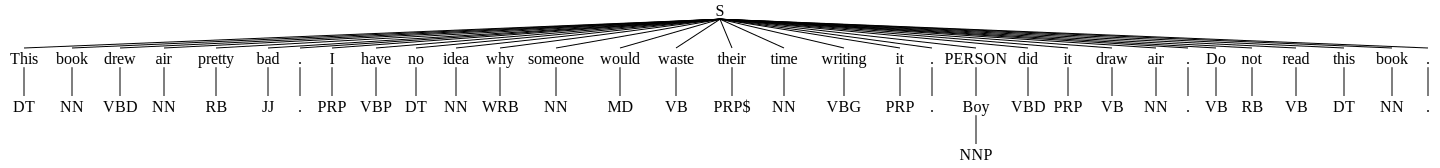

In [14]:
nltk.chunk.ne_chunk(tagged)

In [45]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\ANKIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer() # sentiment intensity analyzer object

In [16]:
sia.polarity_scores('I am very happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [17]:
sia.polarity_scores('They are ugly foolish robbers')

{'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'compound': -0.6597}

In [19]:
sdf = ndf.head(400)
sdf

,Boolean,Subject,Review
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
395,2,serious comedy,FUNNY PEOPLE is somewhat compelling and engagi...
396,1,"Long, somewhat dull and unfocused","This is not a typical Adam Sandler movie, whic..."
397,1,WHICH JOKE DID YOU FIND FUNNY?,"Adam Sadler plays an unlikable comedian, Georg..."
398,2,"Far better than its reputation, and well worth...","Intelligent, funny, sad, real, with a terrific..."


In [22]:
res = {}
for i , row in tqdm(sdf.iterrows() , total = len(sdf)):
    text = row['Review']
    #myid = row['Subject']
    res[i] = sia.polarity_scores(text) # key value pair of the dictionary.
    # code assigns the row index as the unique identifier for each row in the dataframe, and 
    # stores the corresponding sentiment polarity score for the text in the "Review" column in the "res" dictionary.

  0%|          | 0/400 [00:00<?, ?it/s]

In [24]:
pd.set_option('display.max_colwidth', None)

In [29]:
sdf.loc[3]

Boolean                                                                                                                                                                                                                                                                                                                                                                                                                                            2
Subject                                                                                                                                                                                                                                                                                                                                                                                       Remember, Pull Your Jaw Off The Floor After Hearing it
Review     If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that

In [36]:
pd.DataFrame(res).T # Pandas dataframe can take dictionary pretty easily
#.T flips everything

,neg,neu,pos,compound
0,0.019,0.851,0.129,0.8481
1,0.040,0.691,0.269,0.9854
2,0.092,0.628,0.280,0.9753
3,0.000,0.719,0.281,0.9781
4,0.015,0.752,0.233,0.9873
5,0.126,0.803,0.070,-0.8744
6,0.074,0.591,0.335,0.9887
7,0.116,0.705,0.179,0.8353
8,0.000,0.790,0.210,0.8670
9,0.373,0.571,0.056,-0.9233


In [ ]:
vaders.reset_index.rename

In [38]:
vaders = pd.DataFrame(res).T
#vaders = vaders.reset_index().rename(columns = {'index':'id'})
vaders = vaders.merge(sdf, left_index=True, right_index=True, how = 'left')

In [43]:
vaders.head(10)

,neg,neu,pos,compound,Boolean,Subject,Review
0,0.019,0.851,0.129,0.8481,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,0.040,0.691,0.269,0.9854,2,Amazing!,This soundtrack is my favorite music of all ti...
2,0.092,0.628,0.280,0.9753,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,0.000,0.719,0.281,0.9781,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,0.015,0.752,0.233,0.9873,2,an absolute masterpiece,I am quite sure any of you actually taking the...
5,0.126,0.803,0.070,-0.8744,1,Buyer beware,"This is a self-published book, and if you want..."
6,0.074,0.591,0.335,0.9887,2,Glorious story,I loved Whisper of the wicked saints. The stor...
7,0.116,0.705,0.179,0.8353,2,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...
8,0.000,0.790,0.210,0.8670,2,Whispers of the Wicked Saints,This was a easy to read book that made me want...
9,0.373,0.571,0.056,-0.9233,1,The Worst!,A complete waste of time. Typographical errors...


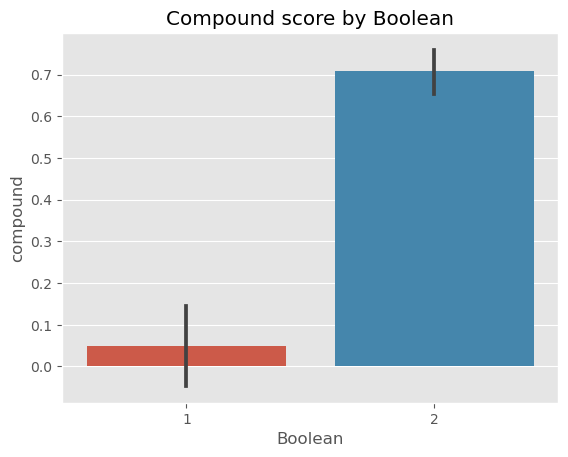

In [44]:
ax = sns.barplot(data = vaders , x = 'Boolean' , y = 'compound')
ax.set_title('Compound score by Boolean')
plt.show() # shows average compound score on y-axis

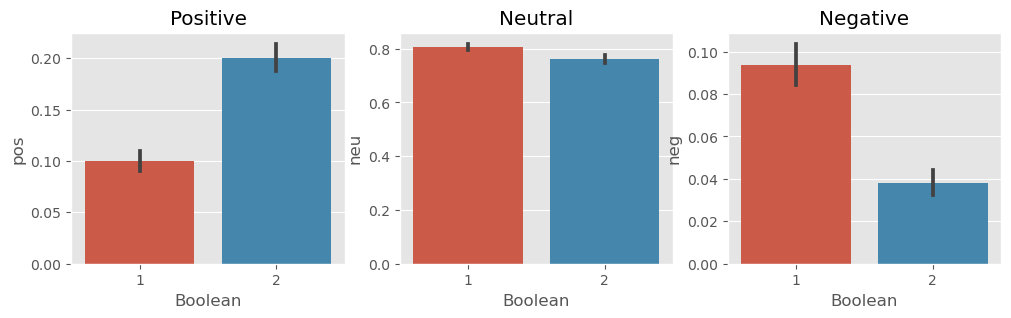

In [46]:
fig , axs = plt.subplots(1,3 , figsize = (12,3))
sns.barplot(data = vaders , x ='Boolean' , y  = 'pos' , ax = axs[0])
sns.barplot(data = vaders , x ='Boolean' , y  = 'neu' , ax = axs[1])
sns.barplot(data = vaders , x ='Boolean' , y  = 'neg' , ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [ ]:
print('hello')